___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [28]:
# IMPORTS HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [29]:
# CODE HERE
df = pd.read_csv('../Data/Miles_Traveled.csv',index_col='DATE',parse_dates=True)
df.index.freq='MS'

In [30]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [31]:
# CODE HERE
df.columns = ['Value']

**TASK: Plot out the time series**

<AxesSubplot:xlabel='DATE'>

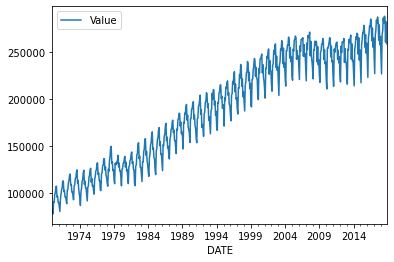

In [32]:
# CODE HERE
df.plot()

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

In [33]:
# CODE HERE
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:xlabel='DATE'>

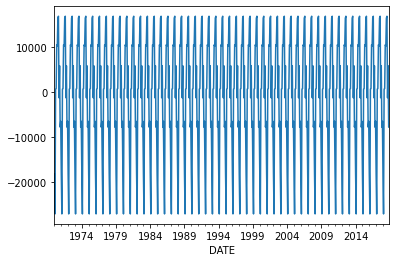

In [34]:
graph=seasonal_decompose(df['Value'])
graph.seasonal.plot()

## Train Test Split

**TASK: Figure out the length of the data set**

In [35]:
# CODE HERE
len(df)

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [36]:
# CODE HERE
train = df[:-12]
test = df[-12:]

In [37]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [38]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [40]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [41]:
#CODE HERE
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 24
generator = TimeseriesGenerator(scaled_train,scaled_train,n_input,batch_size=1)
# generator[4]

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [43]:
model = Sequential()
model.add(LSTM(150,input_shape=(24,1),activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [44]:
# CODE HERE
model.fit_generator(generator,epochs = 50)

C:\Users\kshit\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
552/552 [==============================] - 16s 19ms/step - loss: 0.0287 0s - loss: 0
Epoch 2/50
552/552 [==============================] - 11s 19ms/step - loss: 0.0067
Epoch 3/50
552/552 [==============================] - 10s 19ms/step - loss: 0.0060
Epoch 4/50
552/552 [==============================] - 10s 17ms/step - loss: 0.0056  - ETA: 1s - loss: 0 - ETA: 1s - ETA: 0s - loss
Epoch 5/50
552/552 [==============================] - 10s 18ms/step - loss: 0.0045
Epoch 6/50
552/552 [==============================] - 10s 19ms/step - loss: 0.0034
Epoch 7/50
552/552 [==============================] - 11s 19ms/step - loss: 0.0021
Epoch 8/50
552/552 [==============================] - 11s 19ms/step - loss: 0.0018
Epoch 9/50
552/552 [==============================] - 11s 19ms/step - loss: 0.0017
Epoch 10/50
552/552 [==============================] - 11s 19ms/step - loss: 0.0013
Epoch 11/50
552/552 [==============================] - 11s 19ms/step - loss: 0.0013
Epoch 12/50
552/552 [===

**TASK: Plot the history of the loss that occured during training.**

In [18]:
# CODE HERE


## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [45]:
# CODE HERE
first_eval_batch = scaled_train[-n_input:]
first_eval_batch.shape
first_eval_batch = first_eval_batch.reshape(1,n_input,1)
model.predict(first_eval_batch)[0][0]

0.8117945

**TASK: Generate predictions into the same time stamps as the test set**

In [46]:
# CODE HERE
predictions=[]
for i in range(12):
    current_prediction = model.predict(first_eval_batch)[0][0]
    array = first_eval_batch[:,1:,:][0]
    array = np.append(array,current_prediction)
    predictions.append(current_prediction)
    first_eval_batch = array.reshape(1,n_input,1)
    

[[0.69351266]
 [0.89425491]
 [0.91572217]
 [0.95535514]
 [0.95068151]
 [0.98959986]
 [0.96126745]
 [0.87944793]
 [0.94410222]
 [0.84664675]
 [0.89249694]
 [0.79630397]
 [0.71226435]
 [0.90477416]
 [0.93121043]
 [0.98386382]
 [0.96757519]
 [1.        ]
 [0.9801859 ]
 [0.8824684 ]
 [0.95995255]
 [0.85883345]
 [0.90086755]]
[[0.89425491]
 [0.91572217]
 [0.95535514]
 [0.95068151]
 [0.98959986]
 [0.96126745]
 [0.87944793]
 [0.94410222]
 [0.84664675]
 [0.89249694]
 [0.79630397]
 [0.71226435]
 [0.90477416]
 [0.93121043]
 [0.98386382]
 [0.96757519]
 [1.        ]
 [0.9801859 ]
 [0.8824684 ]
 [0.95995255]
 [0.85883345]
 [0.90086755]
 [0.81179452]]
[[0.91572217]
 [0.95535514]
 [0.95068151]
 [0.98959986]
 [0.96126745]
 [0.87944793]
 [0.94410222]
 [0.84664675]
 [0.89249694]
 [0.79630397]
 [0.71226435]
 [0.90477416]
 [0.93121043]
 [0.98386382]
 [0.96757519]
 [1.        ]
 [0.9801859 ]
 [0.8824684 ]
 [0.95995255]
 [0.85883345]
 [0.90086755]
 [0.81179452]
 [0.76474798]]
[[0.95535514]
 [0.95068151]
 [0

In [47]:
predictions = [predictions]

In [48]:
predictions

[[0.8117945,
  0.764748,
  0.9006648,
  0.9241671,
  0.9661201,
  0.96463996,
  0.9932088,
  0.9701005,
  0.9182388,
  0.9480824,
  0.8783328,
  0.9084936]]

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [49]:
#CODE HERE
predictions = scaler.inverse_transform(predictions)

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [52]:
# CODE HERE
test
sf = pd.DataFrame({'orig':test['Value'],'pred':predictions[0]})
sf

,orig,pred
DATE,,
2018-01-01,245695.0,247838.481422
2018-02-01,226660.0,237963.365174
2018-03-01,268480.0,266492.443521
2018-04-01,272475.0,271425.597747
2018-05-01,286164.0,280231.580119
2018-06-01,280877.0,279920.892605
2018-07-01,288145.0,285917.525700
2018-08-01,286608.0,281067.069677
2018-09-01,260595.0,270181.246273


**TASK: Plot out the test set against your own predicted values.**

<AxesSubplot:xlabel='DATE'>

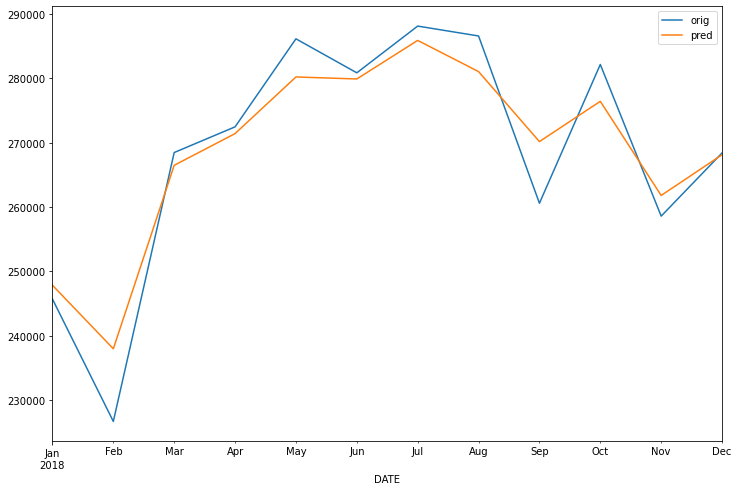

In [53]:
# CODE HERE
sf.plot(figsize=(12,8))

# Saving Models

**TASK: Optional, Save your model!**

In [26]:
model.save('my_try.h5')